## Decision Tree

## Company Data
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


## 1. Import  Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Importing Data

In [2]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Data Understanding

### 3.1 Initail Analysis

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


### 3.2 Data Visualization

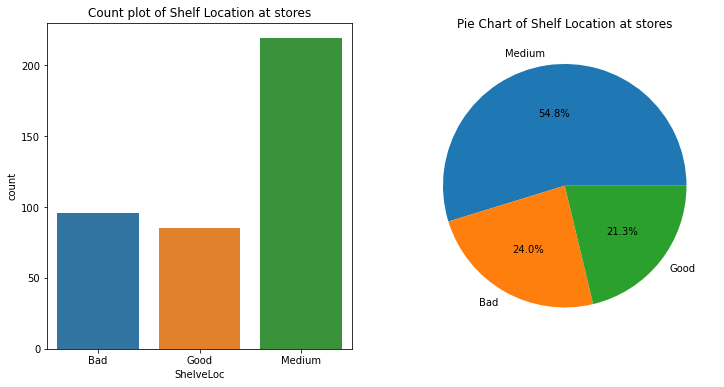

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='ShelveLoc', data=company_data)
plt.title('Count plot of Shelf Location at stores')
plt.subplot(1,2,2)
plt.pie(x=company_data['ShelveLoc'].value_counts(), labels=['Medium','Bad', 'Good'], autopct='%2.1f%%')
plt.title('Pie Chart of Shelf Location at stores')
plt.show()

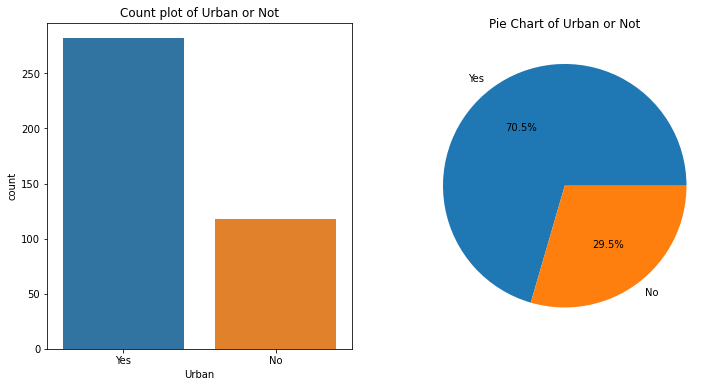

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Urban', data=company_data)
plt.title('Count plot of Urban or Not')
plt.subplot(1,2,2)
plt.pie(x=company_data['Urban'].value_counts(), labels=['Yes','No'], autopct='%2.1f%%')
plt.title('Pie Chart of Urban or Not')
plt.show()

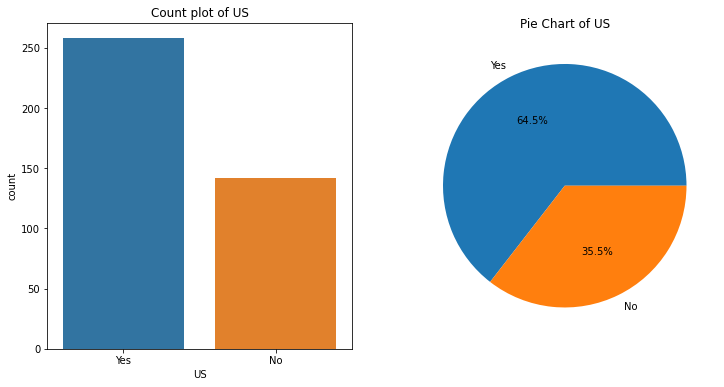

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='US', data=company_data)
plt.title('Count plot of US')
plt.subplot(1,2,2)
plt.pie(x=company_data['US'].value_counts(), labels=['Yes','No'], autopct='%2.1f%%')
plt.title('Pie Chart of US')
plt.show()

#### Checking Normality and Outliers

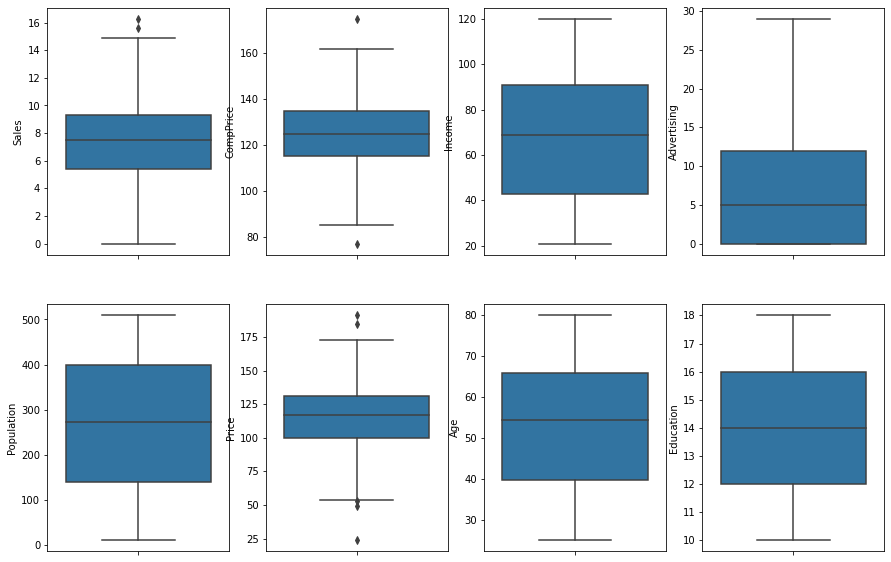

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='Sales',data=company_data)
plt.subplot(2,4,2)
sns.boxplot(y='CompPrice',data=company_data)
plt.subplot(2,4,3)
sns.boxplot(y='Income',data=company_data)
plt.subplot(2,4,4)
sns.boxplot(y='Advertising',data=company_data)
plt.subplot(2,4,5)
sns.boxplot(y='Population',data=company_data)
plt.subplot(2,4,6)
sns.boxplot(y='Price',data=company_data)
plt.subplot(2,4,7)
sns.boxplot(y='Age',data=company_data)
plt.subplot(2,4,8)
sns.boxplot(y='Education',data=company_data)
plt.show()

#### Converting Target Values: Sales into Categorical Values : High, Moderate and Low

In [11]:
company_data['Sales']=pd.cut(x=company_data['Sales'], bins=[0,5.45,10.9,16.35], labels=['Low','Moderate','High'], right=False)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Moderate,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Moderate,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Moderate,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
company_data['Sales'].value_counts()

Moderate    247
Low         102
High         51
Name: Sales, dtype: int64

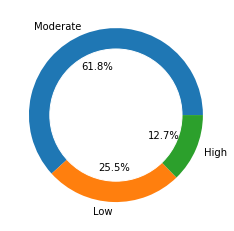

In [13]:
plt.pie(x=company_data['Sales'].value_counts(), labels=['Moderate','Low','High'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

## 4. Data Preparation

In [14]:
le= LabelEncoder()
company_data[['Sales','ShelveLoc','Urban','US']]=company_data[['Sales','ShelveLoc','Urban','US']].apply(le.fit_transform)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


## 5. Model Building

In [15]:
X=company_data.drop('Sales', axis=1)
y=company_data[['Sales']]

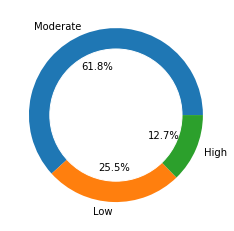

In [16]:
plt.pie(x=y.value_counts(), labels=['Moderate','Low','High'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10, shuffle=True, stratify=y)

In [18]:
X_train.shape, y_train.shape

((300, 10), (300, 1))

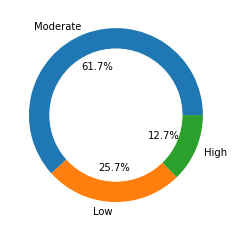

In [19]:
plt.pie(x=y_train.value_counts(), labels=['Moderate','Low','High'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

In [20]:
X_test.shape, y_test.shape

((100, 10), (100, 1))

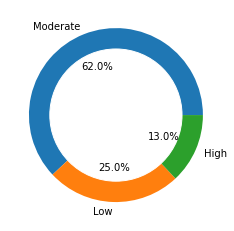

In [21]:
plt.pie(x=y_test.value_counts(), labels=['Moderate','Low','High'], autopct='%2.1f%%')
circle=plt.Circle((0,0),0.76,color='white')
get_current_figure=plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.show()

## 6. Model Training

In [22]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Plot the Tree

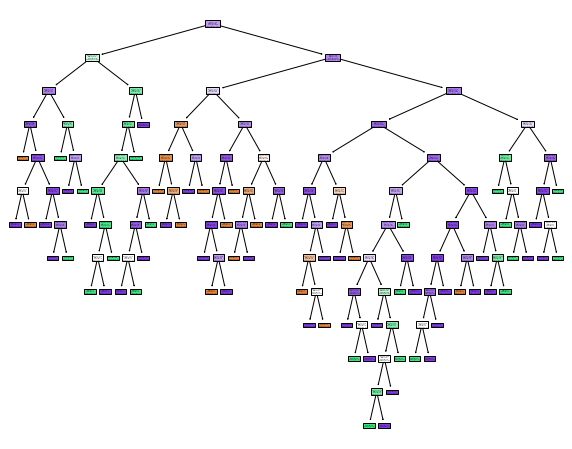

In [23]:
plt.figure(figsize=(10,8))
plot_tree(decision_tree=dt_model,filled=True)
plt.show()

## 7. Model Testing || 8. Model Evaluation

### For training data

In [24]:
y_pred_train=dt_model.predict(X_train)

In [25]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('----------------------------------------------------------------------')
print('Confusion matrix:\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score: 1.0
----------------------------------------------------------------------
Confusion matrix:
 [[ 38   0   0]
 [  0  77   0]
 [  0   0 185]]


### For testing data

In [26]:
y_pred_test=dt_model.predict(X_test)

In [27]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
print('----------------------------------------------------------------------')
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score: 0.59
----------------------------------------------------------------------
Confusion matrix:
 [[ 7  1  5]
 [ 0 13 12]
 [ 8 15 39]]


### Here we are facing Over-fitting problem

To overcome this overfitting problem we use **Pruning**

To get best hyperparameter i.e., best value for Pruning we use **Grid Search method**

In [28]:
grid_search=GridSearchCV(estimator=dt_model,
                         param_grid={'criterion':['entropy','gini'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.7024999999999999


In [29]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Plot the Tree

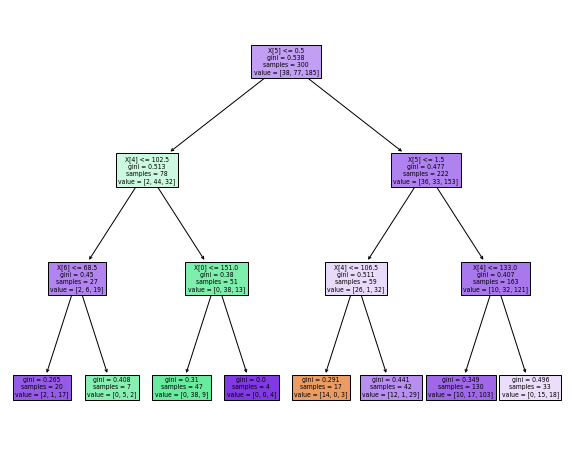

In [30]:
plt.figure(figsize=(10,8))
plot_tree(decision_tree=dt_model, filled=True)
plt.show()

## Model Evaluation

### For training data

In [31]:
y_pred_train=dt_model.predict(X_train)

In [32]:
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('----------------------------------------------------------------------')
print('Confusion matrix:\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score: 0.76
----------------------------------------------------------------------
Confusion matrix:
 [[ 14   0  24]
 [  0  43  34]
 [  3  11 171]]


### For testing data

In [33]:
y_pred_test=dt_model.predict(X_test)

In [34]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
print('----------------------------------------------------------------------')
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score: 0.68
----------------------------------------------------------------------
Confusion matrix:
 [[ 6  0  7]
 [ 0  9 16]
 [ 2  7 53]]


### Now we have somehow overcome the Overfit Problem